In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

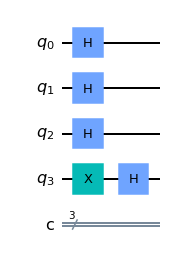

In [2]:
n=3
qc = QuantumCircuit(n+1, n)

# Apply H-gates
for i in range(n):
    qc.h(i)

# Put qubit in state |->
qc.x(n)
qc.h(n)
qc.draw()

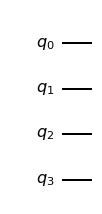

In [3]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

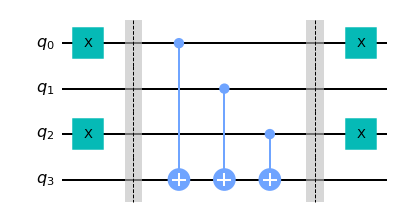

In [4]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

/tmp/ipykernel_313/3472122481.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += const_oracle


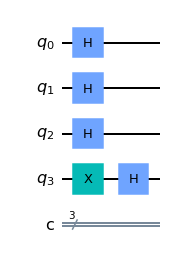

In [5]:
qc = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    qc.h(qubit)

# Put qubit in state |->
qc.x(n)
qc.h(n)

# Add oracle
qc += const_oracle
qc.draw()

/tmp/ipykernel_313/121328849.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += const_oracle


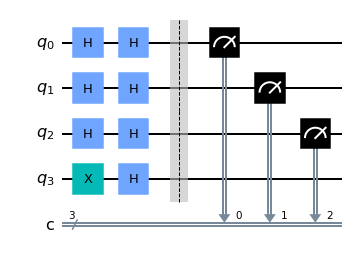

In [6]:
qc= QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    qc.h(qubit)

# Put qubit in state |->
qc.x(n)
qc.h(n)

# Add oracle
qc += const_oracle

# Repeat H-gates
for qubit in range(n):
    qc.h(qubit)
qc.barrier()

# Measure
for i in range(n):
    qc.measure(i, i)

# Display circuit
qc.draw()

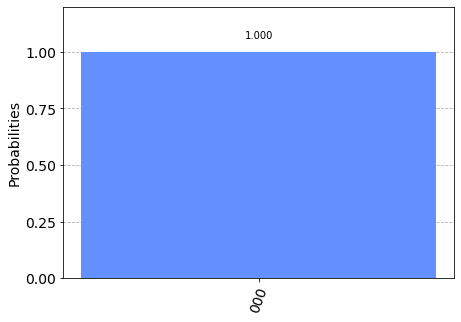

In [7]:
# use local simulator
backend = Aer.get_backend('aer_simulator')
job = assemble(qc, backend)
results = backend.run(job).result().get_counts()
plot_histogram(results)

/tmp/ipykernel_313/4186697628.py:13: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += balanced_oracle


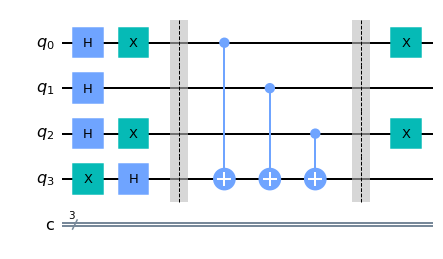

In [8]:
##now implementing using balanced oracle
qc = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    qc.h(qubit)

# Put qubit in state |->
qc.x(n)
qc.h(n)

# Add oracle
qc += balanced_oracle
qc.draw()

/tmp/ipykernel_313/922140854.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += balanced_oracle


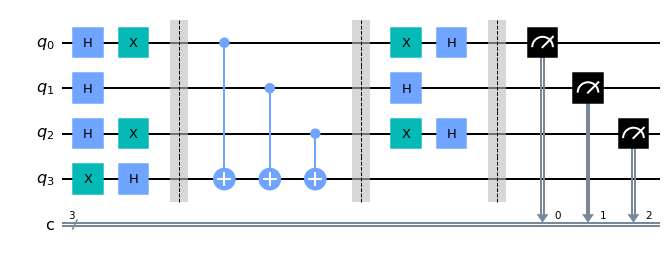

In [9]:
qc = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    qc.h(qubit)

# Put qubit in state |->
qc.x(n)
qc.h(n)

# Add oracle
qc += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    qc.h(qubit)
qc.barrier()

# Measure
for i in range(n):
    qc.measure(i, i)

# Display circuit
qc.draw()

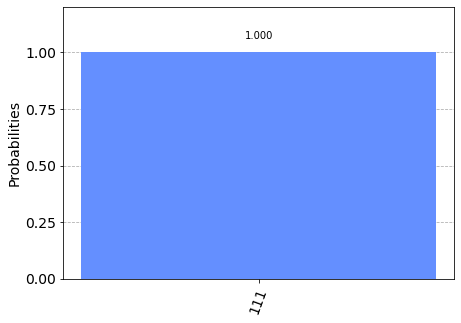

In [10]:
# use local simulator
backend = Aer.get_backend('aer_simulator')
job = assemble(qc, backend)
results = backend.run(job).result().get_counts()
plot_histogram(results)

In [12]:
##Generalized circuit

def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [13]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

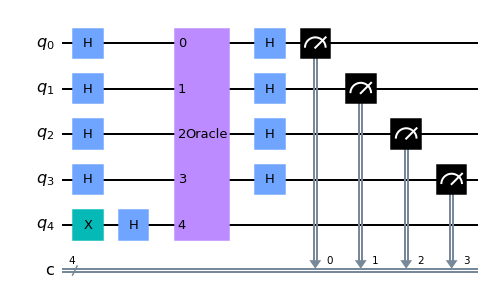

In [14]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

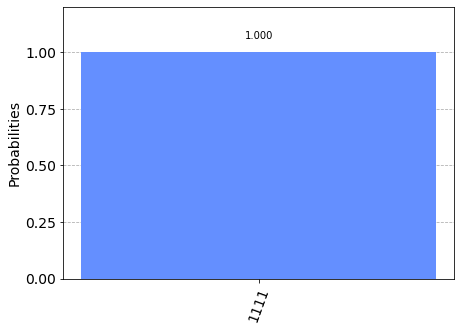

In [16]:
transpiled_dj_circuit = transpile(dj_circuit, backend)
qobj = assemble(transpiled_dj_circuit)
results = backend.run(qobj).result().get_counts()
plot_histogram(results)

In [17]:
##running on actual hardware
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_quito


In [18]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


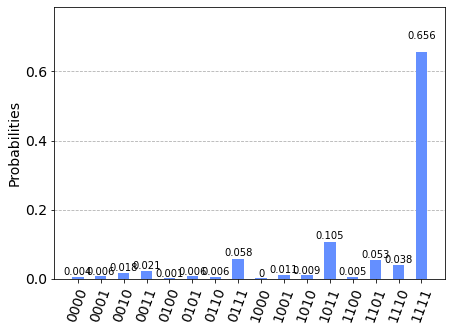

In [19]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)